# EV Market Segmentation by Rishabh Hanselia

In [2]:
import pandas as pd
import numpy as np
import textblob
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## 2 Wheeler EV Customer Sentiment

In [39]:
df= pd.read_csv("C:/Users/risha/Downloads/archive (2)/2-wheeler-EV-bikewale.csv")

In [40]:
df.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              797 non-null    object 
 1   Used it for         844 non-null    object 
 2   Owned for           844 non-null    object 
 3   Ridden for          668 non-null    object 
 4   rating              844 non-null    int64  
 5   Visual Appeal       739 non-null    float64
 6   Reliability         716 non-null    float64
 7   Performance         345 non-null    float64
 8   Service Experience  703 non-null    float64
 9   Extra Features      185 non-null    float64
 10  Comfort             530 non-null    float64
 11  Maintenance cost    180 non-null    float64
 12  Value for Money     390 non-null    float64
 13  Model Name          844 non-null    object 
dtypes: float64(8), int64(1), object(5)
memory usage: 92.4+ KB


In [42]:
df.shape

(844, 14)

In [43]:
df.isna().sum()

review                 47
Used it for             0
Owned for               0
Ridden for            176
rating                  0
Visual Appeal         105
Reliability           128
Performance           499
Service Experience    141
Extra Features        659
Comfort               314
Maintenance cost      664
Value for Money       454
Model Name              0
dtype: int64

In [44]:
df["Used it for"].unique()

array(['Daily Commute', 'Everything', 'Occasional Commute',
       'Leisure Rides', 'Tours'], dtype=object)

In [45]:
def used_for_encoder(x):
    if x== 'Daily Commute':
        return 0
    elif x== 'Everything':
        return 1
    elif x== 'Occasional Commute':
        return 2
    elif x== 'Leisure Rides':
        return 3
    elif x== 'Tours':
        return 4

In [46]:
df['Used it for']= df['Used it for'].apply(used_for_encoder)

In [8]:
def sentiment(text):
    if type(text) == str:
        blob = textblob.TextBlob(text)
        return blob.sentiment.polarity
    else: return 0

In [48]:
(df.review.apply(sentiment)).mean()

0.1724711234846989

In [49]:
df['sentiment'] = df.review.apply(sentiment)

In [50]:
df['Ridden for'] = df['Ridden for'].replace({np.nan:0, '< 5000 kms':5000, '5000-10000 kms':7500, '> 15000 kms':15000,
       '10000-15000 kms':12500, 'Never owned':0})

In [51]:
df = df.fillna(0)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              844 non-null    object 
 1   Used it for         844 non-null    int64  
 2   Owned for           844 non-null    object 
 3   Ridden for          844 non-null    int64  
 4   rating              844 non-null    int64  
 5   Visual Appeal       844 non-null    float64
 6   Reliability         844 non-null    float64
 7   Performance         844 non-null    float64
 8   Service Experience  844 non-null    float64
 9   Extra Features      844 non-null    float64
 10  Comfort             844 non-null    float64
 11  Maintenance cost    844 non-null    float64
 12  Value for Money     844 non-null    float64
 13  Model Name          844 non-null    object 
 14  sentiment           844 non-null    float64
dtypes: float64(9), int64(3), object(3)
memory usage: 99.0+ KB

In [53]:
df.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,sentiment
0,We all checked the bike's capacity to be 150 k...,0,Never owned,0,1,3.0,4.0,0.0,0.0,0.0,4.0,0.0,1.0,TVS iQube,0.131250
1,Performance is very poor on this bike. The cha...,1,> 1 yr,5000,1,3.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,TVS iQube,-0.192143
2,I purchased this in April 2022 and the sales s...,0,< 3 months,5000,3,4.0,4.0,0.0,2.0,0.0,5.0,0.0,2.0,TVS iQube,0.247727
3,If any issues come in scooty parts not availab...,0,6 months-1 yr,7500,1,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,TVS iQube,0.080952
4,Don't buy this vehicle unless you have a near ...,0,6 months-1 yr,5000,1,3.0,4.0,0.0,1.0,0.0,3.0,0.0,2.0,TVS iQube,-0.093750


In [54]:
df_numeric = df.select_dtypes(['float', 'int'])
df_numeric.head()

,Used it for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,sentiment
0,0,0,1,3.0,4.0,0.0,0.0,0.0,4.0,0.0,1.0,0.131250
1,1,5000,1,3.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,-0.192143
2,0,5000,3,4.0,4.0,0.0,2.0,0.0,5.0,0.0,2.0,0.247727
3,0,7500,1,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.080952
4,0,5000,1,3.0,4.0,0.0,1.0,0.0,3.0,0.0,2.0,-0.093750


In [55]:
df_numeric

,Used it for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,sentiment
0,0,0,1,3.0,4.0,0.0,0.0,0.0,4.0,0.0,1.0,0.131250
1,1,5000,1,3.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,-0.192143
2,0,5000,3,4.0,4.0,0.0,2.0,0.0,5.0,0.0,2.0,0.247727
3,0,7500,1,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.080952
4,0,5000,1,3.0,4.0,0.0,1.0,0.0,3.0,0.0,2.0,-0.093750
...,...,...,...,...,...,...,...,...,...,...,...,...
839,0,5000,2,2.0,2.0,0.0,2.0,0.0,2.0,0.0,3.0,0.033333
840,1,5000,5,5.0,5.0,5.0,5.0,5.0,0.0,5.0,0.0,0.456667
841,0,7500,2,2.0,2.0,4.0,2.0,3.0,0.0,1.0,0.0,0.250000
842,0,5000,5,4.0,4.0,0.0,0.0,0.0,4.0,0.0,5.0,0.129545


In [56]:
df_numeric.shape

(844, 12)

In [59]:
df_pca = PCA(n_components=12)
df_numeric_pca = df_pca.fit_transform(df_numeric)
df_numeric_pca[:5]

array([[-5.09478639e+03,  1.58309833e+00, -2.36834758e+00,
         6.93318868e-01, -2.34437966e+00,  8.90547089e-01,
         1.53971857e-01, -2.25101505e+00, -1.14114697e+00,
         9.51136872e-01,  1.24872552e+00,  2.56382924e-01],
       [-9.47862754e+01,  1.77955972e+00, -3.00960813e+00,
        -2.35716905e-01, -1.79265216e+00,  6.83576224e-01,
         5.06250259e-01,  7.51413109e-01, -7.38490391e-01,
        -6.07202705e-01,  4.61640937e-02, -6.33975449e-02],
       [-9.47867691e+01, -1.66015633e+00, -2.19550254e+00,
         7.34705135e-01, -9.43846677e-01,  6.21080758e-01,
        -2.35343438e-01, -8.88416022e-01, -7.99764770e-01,
         1.06020837e+00,  1.03161866e+00,  1.33680993e-01],
       [ 2.40521382e+03,  3.89773131e+00, -1.72761334e+00,
         9.25447299e-02, -5.54913031e-01, -7.67558861e-01,
        -2.51479715e-01, -3.96598353e-01,  4.28394133e-02,
        -2.19197662e-01,  9.19056643e-02,  1.80157388e-01],
       [-9.47864081e+01,  7.57363134e-01, -2.0653677

In [17]:
def pca_plot(pca, df, x_axis=0, y_axis=1, scale=1):
    plt.scatter(pca.components_[x_axis]*scale, pca.components_[y_axis]*scale, color='black')
    for x,y,name in zip(pca.components_[x_axis]*scale, pca.components_[y_axis]*scale, df.columns):
        plt.text(x, y+0.02, name, color='blue')
        plt.annotate('', (x,y), (0,0), arrowprops=dict(arrowstyle='->', color='red'))
    plt.scatter(0, 0, c='red')
    plt.xlabel(f'PCA{x_axis+1}')
    plt.ylabel(f'PCA{y_axis+1}')
    plt.show()

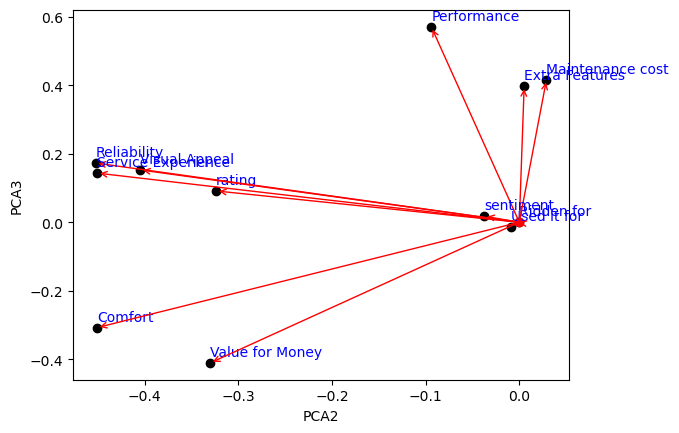

In [64]:
pca_plot(df_pca, df_numeric, 1, 2)

## 4  Wheeler EV Customer Sentiment

In [3]:
df_4wcw= pd.read_csv("C:/Users/risha/Downloads/archive (2)/4-wheeler-EV-carwale.csv")

In [4]:
df_4wcw.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona


In [6]:
df_4wcw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review           129 non-null    object 
 1   Exterior         129 non-null    float64
 2   Comfort          129 non-null    float64
 3   Performance      129 non-null    float64
 4   Fuel Economy     129 non-null    float64
 5   Value for Money  129 non-null    float64
 6   Condition        129 non-null    object 
 7   driven           129 non-null    object 
 8   rating           129 non-null    float64
 9   model_name       129 non-null    object 
dtypes: float64(6), object(4)
memory usage: 10.2+ KB


In [7]:
df_4wcw.isna().sum()

review             0
Exterior           0
Comfort            0
Performance        0
Fuel Economy       0
Value for Money    0
Condition          0
driven             0
rating             0
model_name         0
dtype: int64

In [9]:
(df_4wcw.review.apply(sentiment)).mean()

0.36300056328722496

In [11]:
df_4wcw['sentiment'] = df_4wcw.review.apply(sentiment)

In [12]:
df_4wcw.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name,sentiment
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona,0.650000
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona,-0.341667
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona,0.611111
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona,0.355556
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona,0.141667


In [13]:
df_4wcw_numeric = df_4wcw.select_dtypes(['float', 'int'])
df_4wcw_numeric.head()

,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating,sentiment
0,5.0,4.0,5.0,5.0,5.0,5.0,0.650000
1,1.0,1.0,1.0,1.0,1.0,0.0,-0.341667
2,4.0,5.0,5.0,5.0,4.0,5.0,0.611111
3,5.0,5.0,5.0,5.0,5.0,5.0,0.355556
4,4.0,4.0,5.0,3.0,2.0,3.0,0.141667


In [14]:
df_4wcw_numeric.shape

(129, 7)

In [16]:
df_4wcw_pca = PCA(n_components=7)
df_4wcw_numeric_pca = df_4wcw_pca.fit_transform(df_4wcw_numeric)
df_4wcw_numeric_pca[:5]

array([[-1.20128741e+00,  2.66918097e-01, -4.41153563e-01,
         1.09199579e-01, -4.35465888e-02,  7.58936698e-01,
         2.18715921e-01],
       [ 8.63512217e+00, -1.79805685e-01, -1.14124213e+00,
        -4.01116037e-01, -5.32542787e-01, -9.70193397e-02,
        -3.34965682e-01],
       [-7.49008743e-01,  2.24953737e-01,  1.36656051e-01,
         7.43853942e-01, -2.75236042e-01, -6.56262436e-01,
         2.64286156e-01],
       [-1.55165275e+00, -3.56027715e-02, -5.49300365e-02,
        -7.50563742e-02,  4.86881095e-02, -8.56367151e-03,
        -8.41699564e-02],
       [ 2.27172268e+00, -3.98947962e-01,  1.39188639e+00,
         2.20226475e-01, -1.40175471e+00,  6.15563156e-02,
        -4.43199830e-03]])

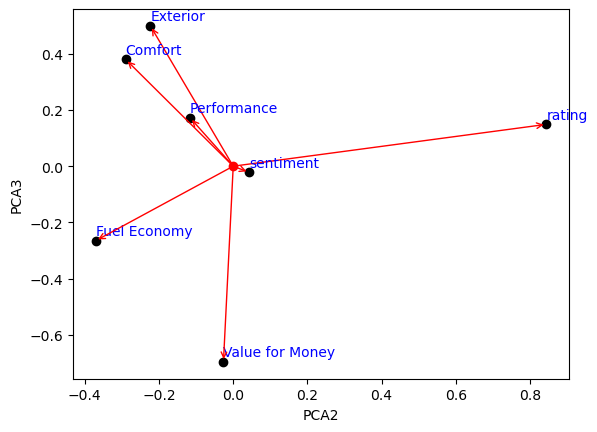

In [18]:
pca_plot(df_4wcw_pca, df_4wcw_numeric, 1, 2)

## EV Units across states in India

In [121]:
df_us= pd.read_csv("C:/Users/risha/Downloads/RS_Session_256_AU_95_C.csv")

In [122]:
df_us.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
0,Andaman and Nicobar Island,1,30.0,81,NaN,40.0,NaN,NaN,NaN,7.0,159
1,Arunachal Pradesh,14,NaN,5,NaN,NaN,NaN,NaN,NaN,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,NaN,NaN,NaN,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,NaN,NaN,NaN,8.0,64241
4,Chandigarh,298,1410.0,182,NaN,40.0,NaN,NaN,NaN,1.0,1931


In [123]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State Name                      33 non-null     object 
 1   Two Wheeler                     33 non-null     int64  
 2   Three Wheeler                   29 non-null     float64
 3   Four Wheeler                    33 non-null     int64  
 4   Goods Vehicles                  29 non-null     float64
 5   Public Service Vehicle          25 non-null     float64
 6   Special Category Vehicles       10 non-null     float64
 7   Ambulance/Hearses               6 non-null      float64
 8   Construction Equipment Vehicle  6 non-null      float64
 9   Other                           29 non-null     float64
 10  Grand Total                     33 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 3.0+ KB


In [124]:
df_us.isna().sum()

State Name                         0
Two Wheeler                        0
Three Wheeler                      4
Four Wheeler                       0
Goods Vehicles                     4
Public Service Vehicle             8
Special Category Vehicles         23
Ambulance/Hearses                 27
Construction Equipment Vehicle    27
Other                              4
Grand Total                        0
dtype: int64

In [125]:
df_us = df_us.fillna(0)

In [126]:
df_us.isna().sum()

State Name                        0
Two Wheeler                       0
Three Wheeler                     0
Four Wheeler                      0
Goods Vehicles                    0
Public Service Vehicle            0
Special Category Vehicles         0
Ambulance/Hearses                 0
Construction Equipment Vehicle    0
Other                             0
Grand Total                       0
dtype: int64

In [127]:
df_us.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159
1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241
4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931


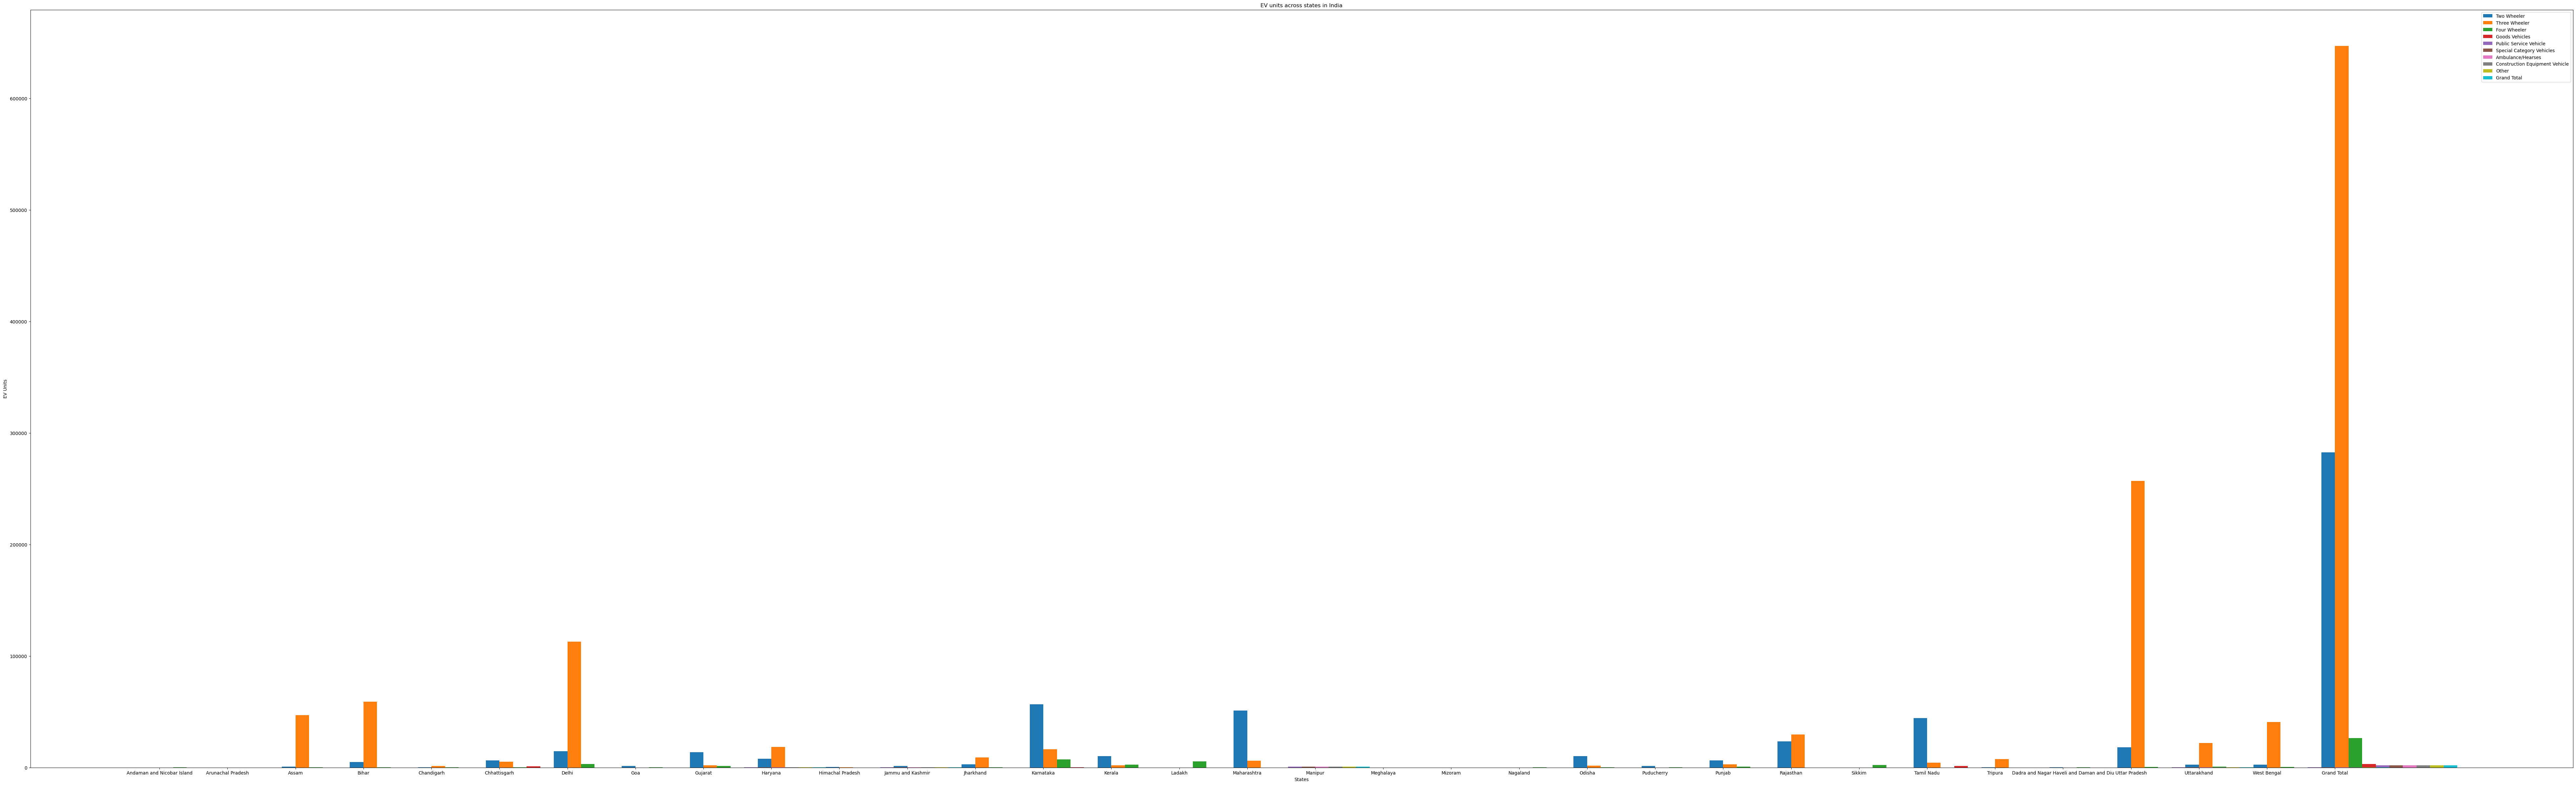

In [128]:
# Sample data (replace with your data)
categories = df_us['State Name']
data1 = df_us['Two Wheeler']
data2 = df_us['Three Wheeler']
data3 = df_us['Four Wheeler']
data4 = df_us['Goods Vehicles']
data5 = df_us['Public Service Vehicle']
data6 = df_us['Special Category Vehicles']
data7 = df_us['Ambulance/Hearses']
data8 = df_us['Construction Equipment Vehicle']
data9 = df_us['Other']
data10 = df_us['Grand Total']


# Create a bar plot with positions adjusted to avoid overlap
bar_width = 0.2
gap_width = 0.5  # Adjust gap size as needed
total_width = bar_width + gap_width
index = range(len(categories))

plt.bar(index, data1, bar_width, label="Two Wheeler")
plt.bar([p + bar_width for p in index], data2, bar_width, label="Three Wheeler")
plt.bar([p + 2*bar_width for p in index], data3, bar_width, label="Four Wheeler")
plt.bar([p + 3*bar_width for p in index], data4, bar_width, label="Goods Vehicles")
plt.bar([p + 4*bar_width for p in index], data5, bar_width, label="Public Service Vehicle")
plt.bar([p + 5*bar_width for p in index], data5, bar_width, label="Special Category Vehicles")
plt.bar([p + 6*bar_width for p in index], data5, bar_width, label="Ambulance/Hearses")
plt.bar([p + 7*bar_width for p in index], data5, bar_width, label="Construction Equipment Vehicle")
plt.bar([p + 8*bar_width for p in index], data5, bar_width, label="Other")
plt.bar([p + 9*bar_width for p in index], data5, bar_width, label="Grand Total")

# Set labels and title
plt.xlabel("States")
plt.ylabel("EV Units")
plt.title("EV units across states in India")

# Add legend
plt.legend()

# Set x-axis tick positions and labels
plt.xticks([p + bar_width / 2 for p in index], categories)

#plt.figure(figsize=(10, 6))

plt.rcParams['figure.figsize'] = [150, 50]

# Display the plot
plt.show()


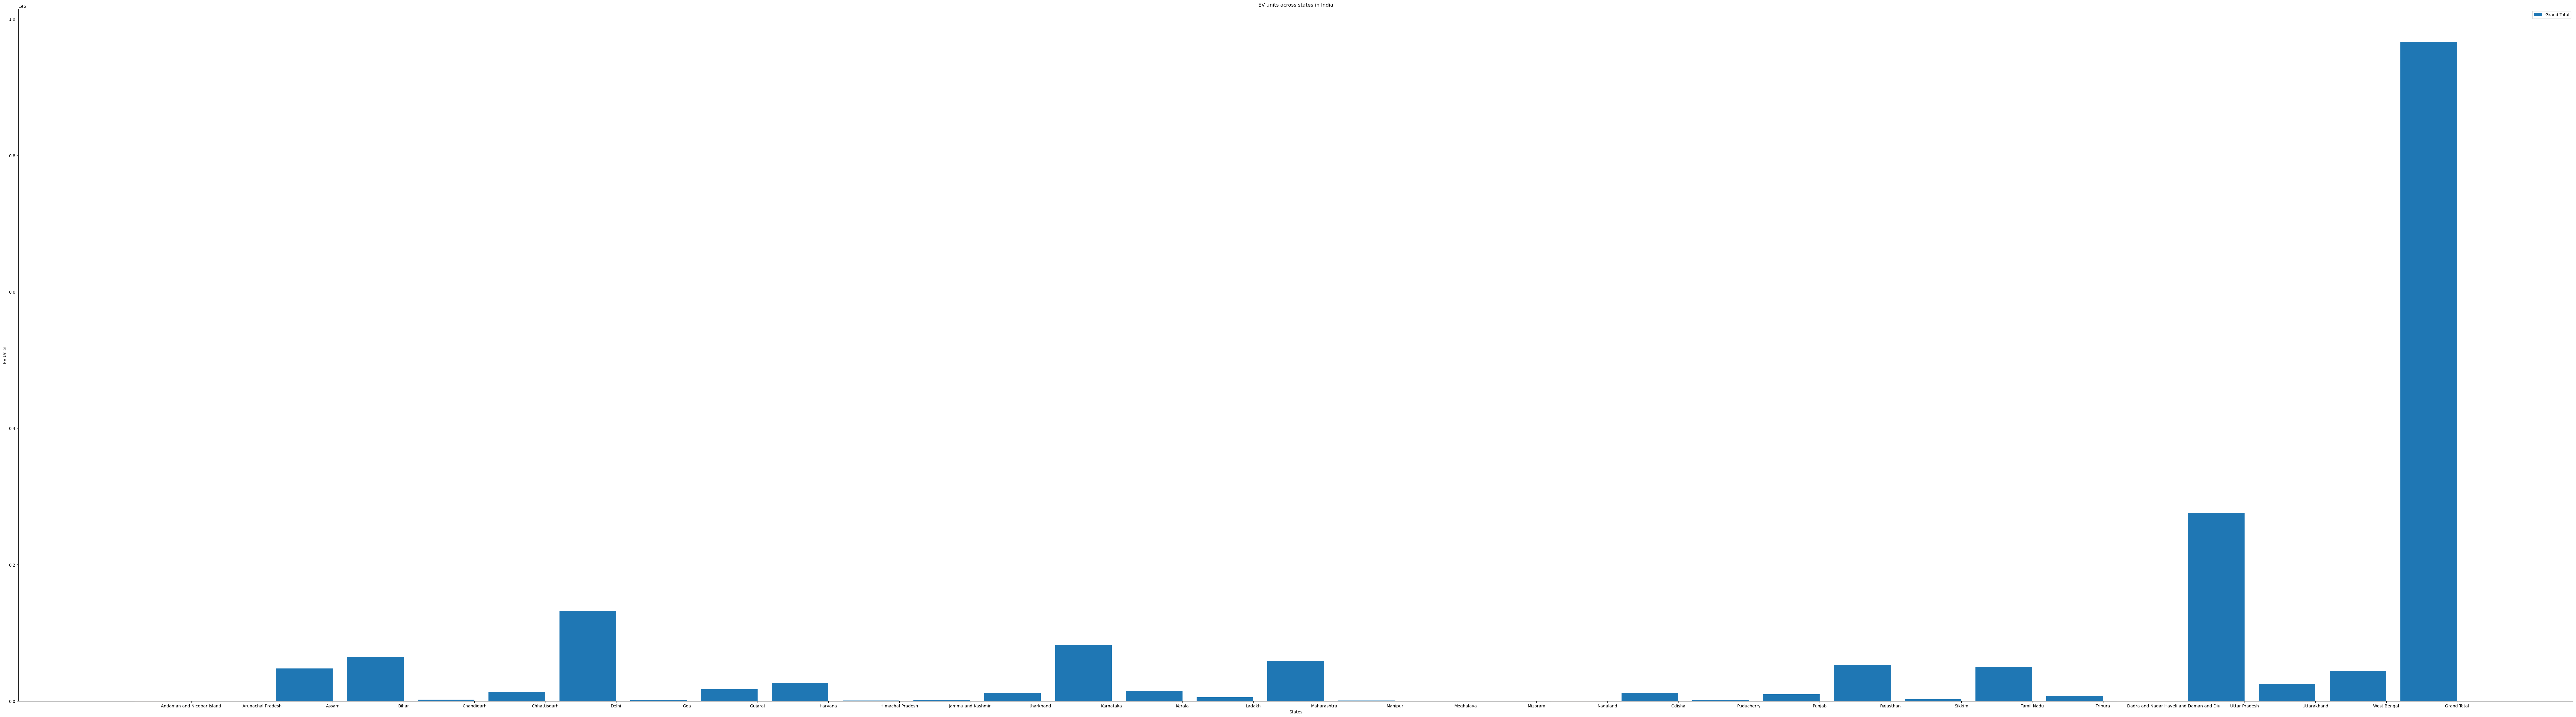

In [179]:
# Sample data (replace with your data)
categories = df_us['State Name']
data1 = df_us['Grand Total']


# Create a bar plot with positions adjusted to avoid overlap
bar_width = 0.8

index = range(len(categories))

plt.bar(index, data1, bar_width, label="Grand Total")

# Set labels and title
plt.xlabel("States")
plt.ylabel("EV Units")
plt.title("EV units across states in India")

# Add legend
plt.legend()

# Set x-axis tick positions and labels
plt.xticks([p + bar_width / 2 for p in index], categories)

#plt.figure(figsize=(10, 6))

plt.rcParams['figure.figsize'] = [110, 30]

# Display the plot
plt.show()


## EV Charging Stations across India

In [108]:
df_cs= pd.read_csv("C:/Users/risha/Downloads/ev_final.csv", sep=',', encoding='ISO-8859-1')

In [109]:
df_cs.head()

,uid,name,vendor_name,address,latitude,longitude,city,country,open,close,...,postal_code,zone,0,available,capacity,cost_per_unit,power_type,total,type,vehicle_type
0,STATIC12,GensolCharge Pvt. Ltd.,GensolCharge Pvt. Ltd.,"NDSE Grid, BRPL South Extension",28.568238,77.219666,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,2.0,BEVC DC 001,['4W']
1,STATIC14,REIL,REIL,Scada office kalka ji,28.541995,77.260583,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,3.3 kW,NaN,AC,3.0,BEVC AC 001,"['2W', '3W', '4W']"
2,STATIC15,REIL,REIL,Ashram Chowk Mathura Road,28.571189,77.259806,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,2.0,BEVC DC 001,['4W']
3,STATIC16,REIL,REIL,Nizamuddin Railway station,28.588991,77.253240,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,4.0,BEVC DC 001,['4W']
4,STATIC17,BluSmart,BluSmart,"BSES Bhawan, Nehru Place, New Delhi 110048",28.549427,77.254636,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,1.0,BEVC DC 001,['4W']


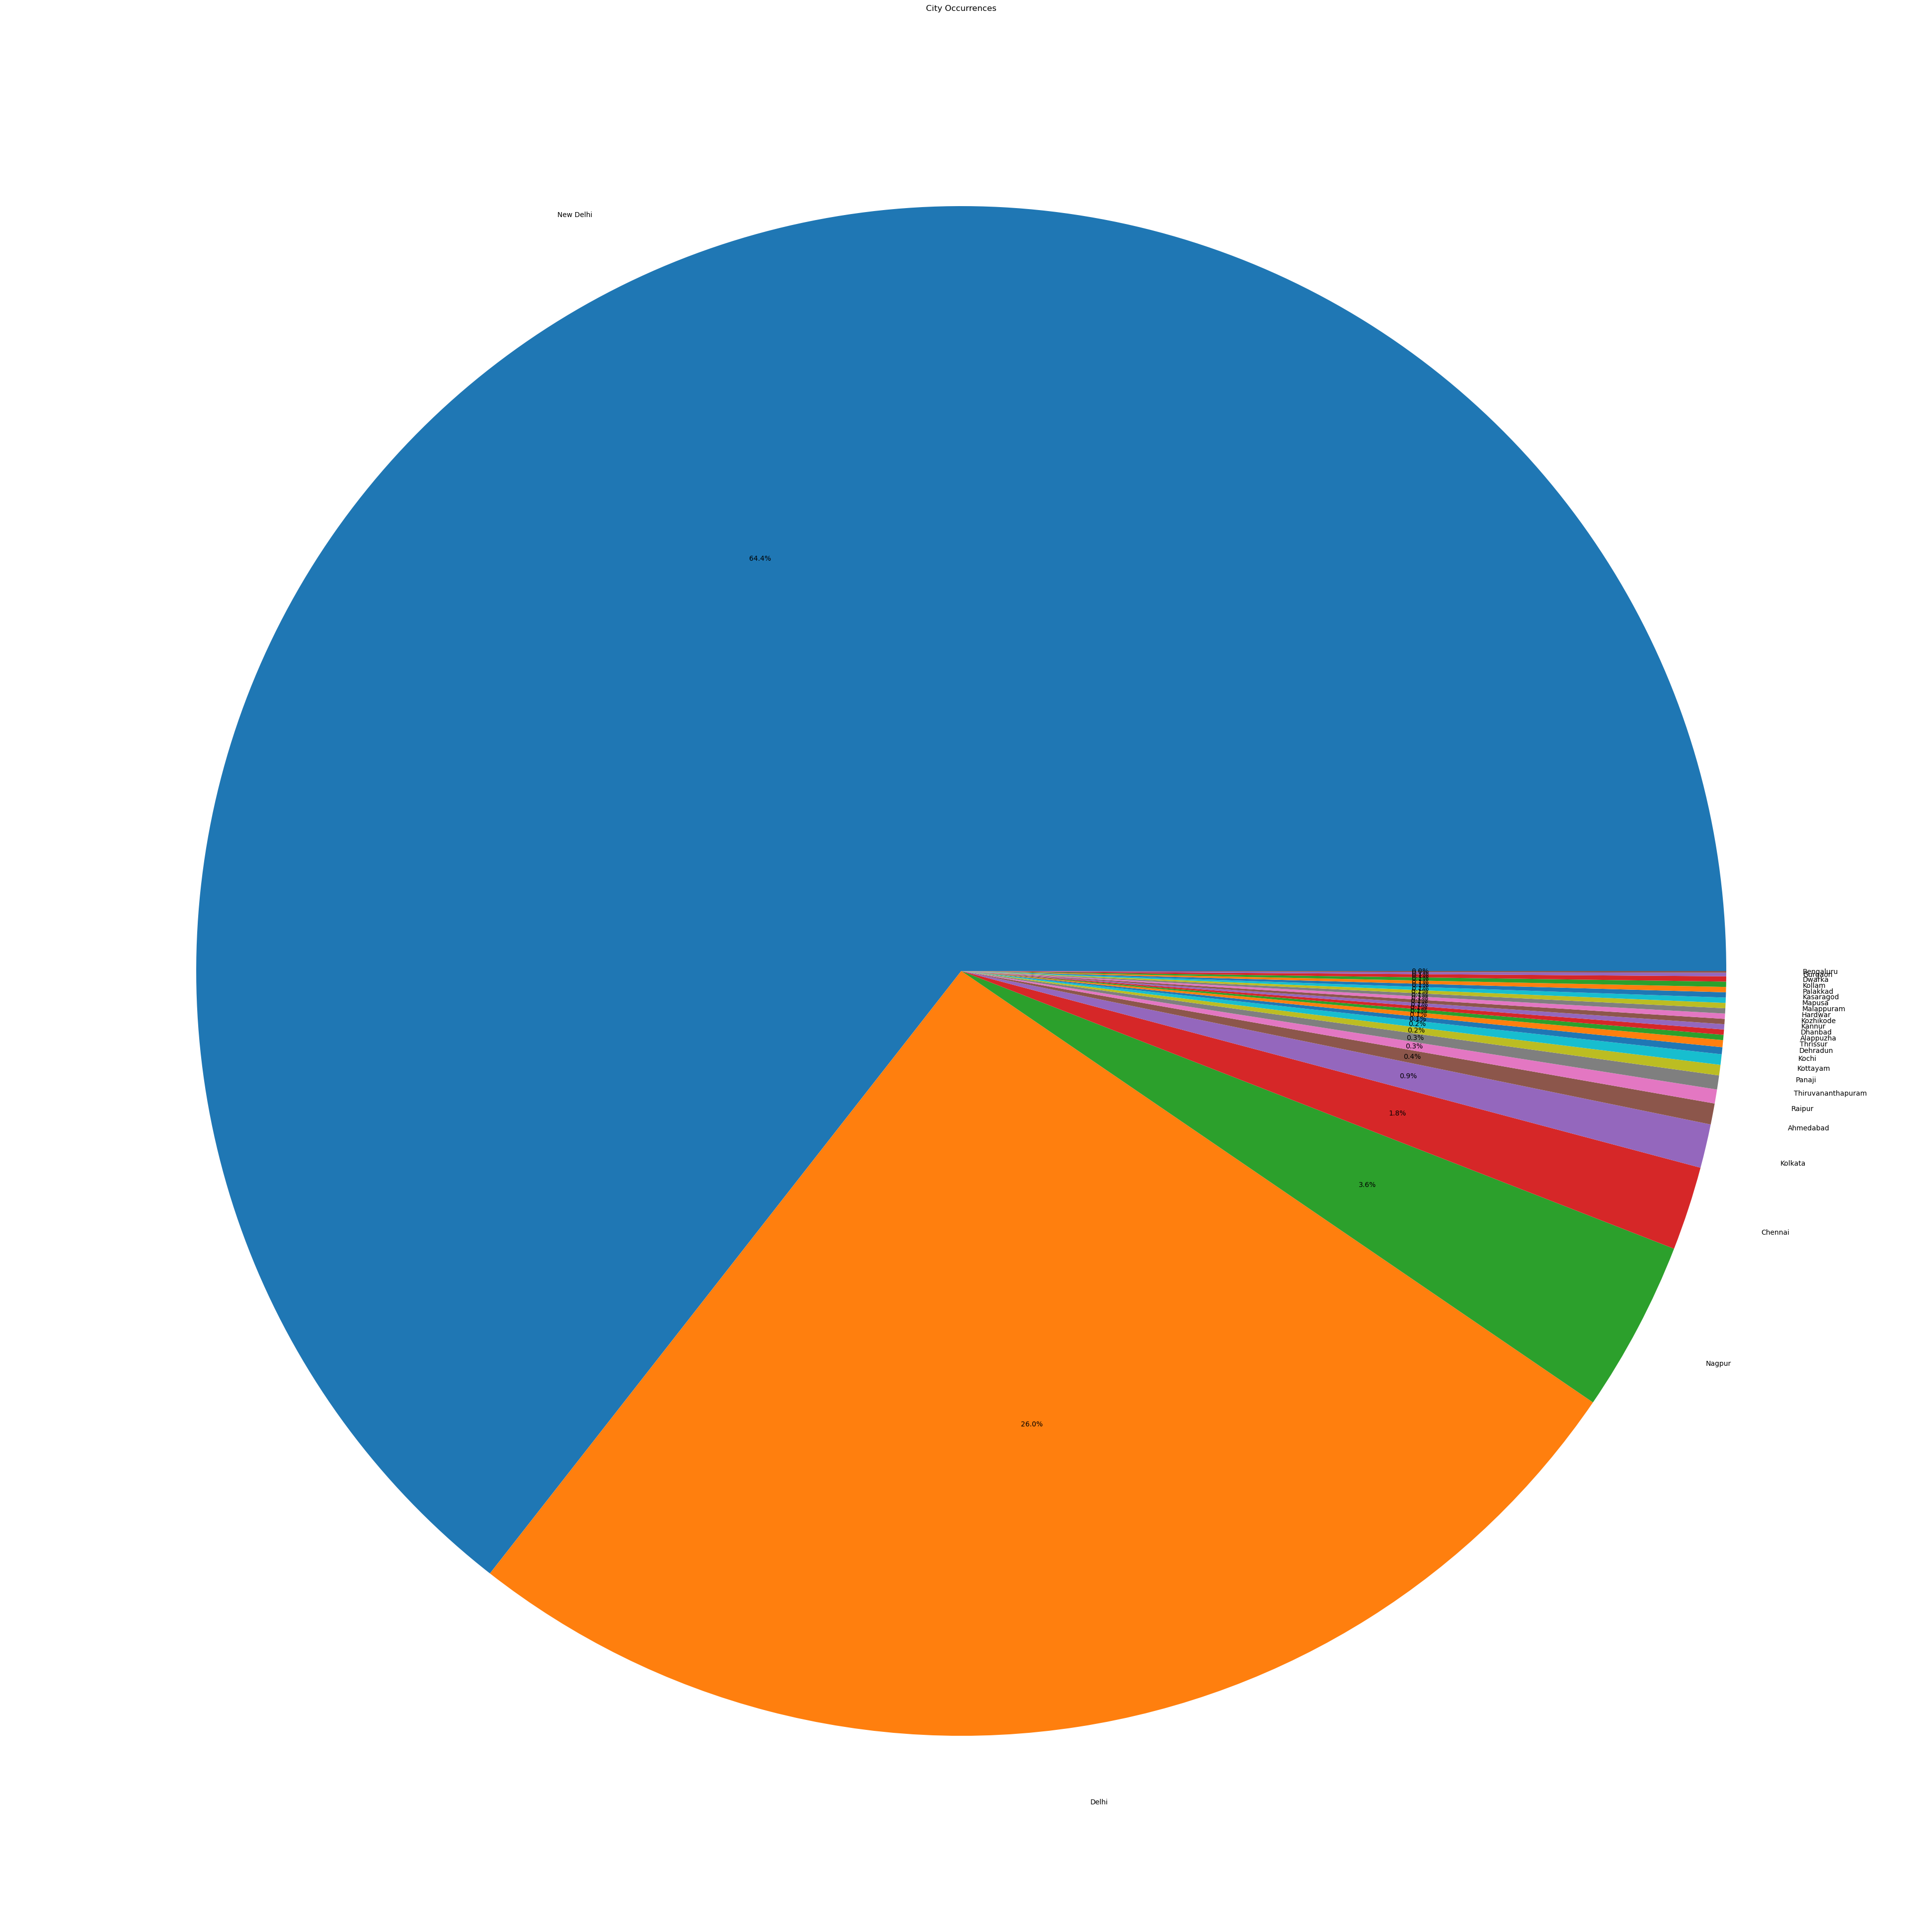

In [111]:
# Count occurrences of each city
city_counts = df_cs['city'].value_counts()

# Get pie chart slice labels
pie_chart_slice_labels = city_counts.index.to_numpy()


# Get pie chart slice values
pie_chart_slice_values = city_counts.to_numpy()

# Create a pie chart
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")  # Adjust format string for percentages as needed
plt.title("City Occurrences")

plt.rcParams['figure.figsize'] = [100, 30]

# Display the plot
plt.show()

In [112]:
city_counts

New Delhi             1743
Delhi                  704
Nagpur                  98
Chennai                 48
Kolkata                 25
Ahmedabad               12
Raipur                   8
Thiruvananthapuram       8
Panaji                   6
Kottayam                 6
Kochi                    4
Dehradun                 4
Thrissur                 3
Alappuzha                3
Dhanbad                  3
Kannur                   3
Kozhikode                3
Hardwar                  3
Malappuram               3
Mapusa                   3
Kasaragod                3
Palakkad                 3
Kollam                   3
Dwarka                   3
Gurgaon                  2
Bengaluru                1
Name: city, dtype: int64

## EV Sales in India

In [56]:
df_sales= pd.read_csv("C:/Users/risha/Downloads/archive (4)/EV_Sales.csv")

In [57]:
df_sales.head()

,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,Apr-17,96,4748,198,0,5042
1,May-17,91,6720,215,2,7028
2,Jun-17,137,7178,149,1,7465
3,Jul-17,116,8775,120,0,9011
4,Aug-17,99,8905,137,0,9141


In [59]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   YEAR    74 non-null     object
 1   2 W     74 non-null     int64 
 2   3 W     74 non-null     int64 
 3   4 W     74 non-null     int64 
 4   BUS     74 non-null     int64 
 5   TOTAL   74 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 3.6+ KB


In [60]:
years=list(df_sales['YEAR'])

In [61]:
w2=list(df_sales['2 W'])

In [62]:
w3=list(df_sales['3 W'])

In [64]:
w4=list(df_sales['4 W'])

In [65]:
bus=list(df_sales['BUS'])

In [66]:
total=list(df_sales['TOTAL'])

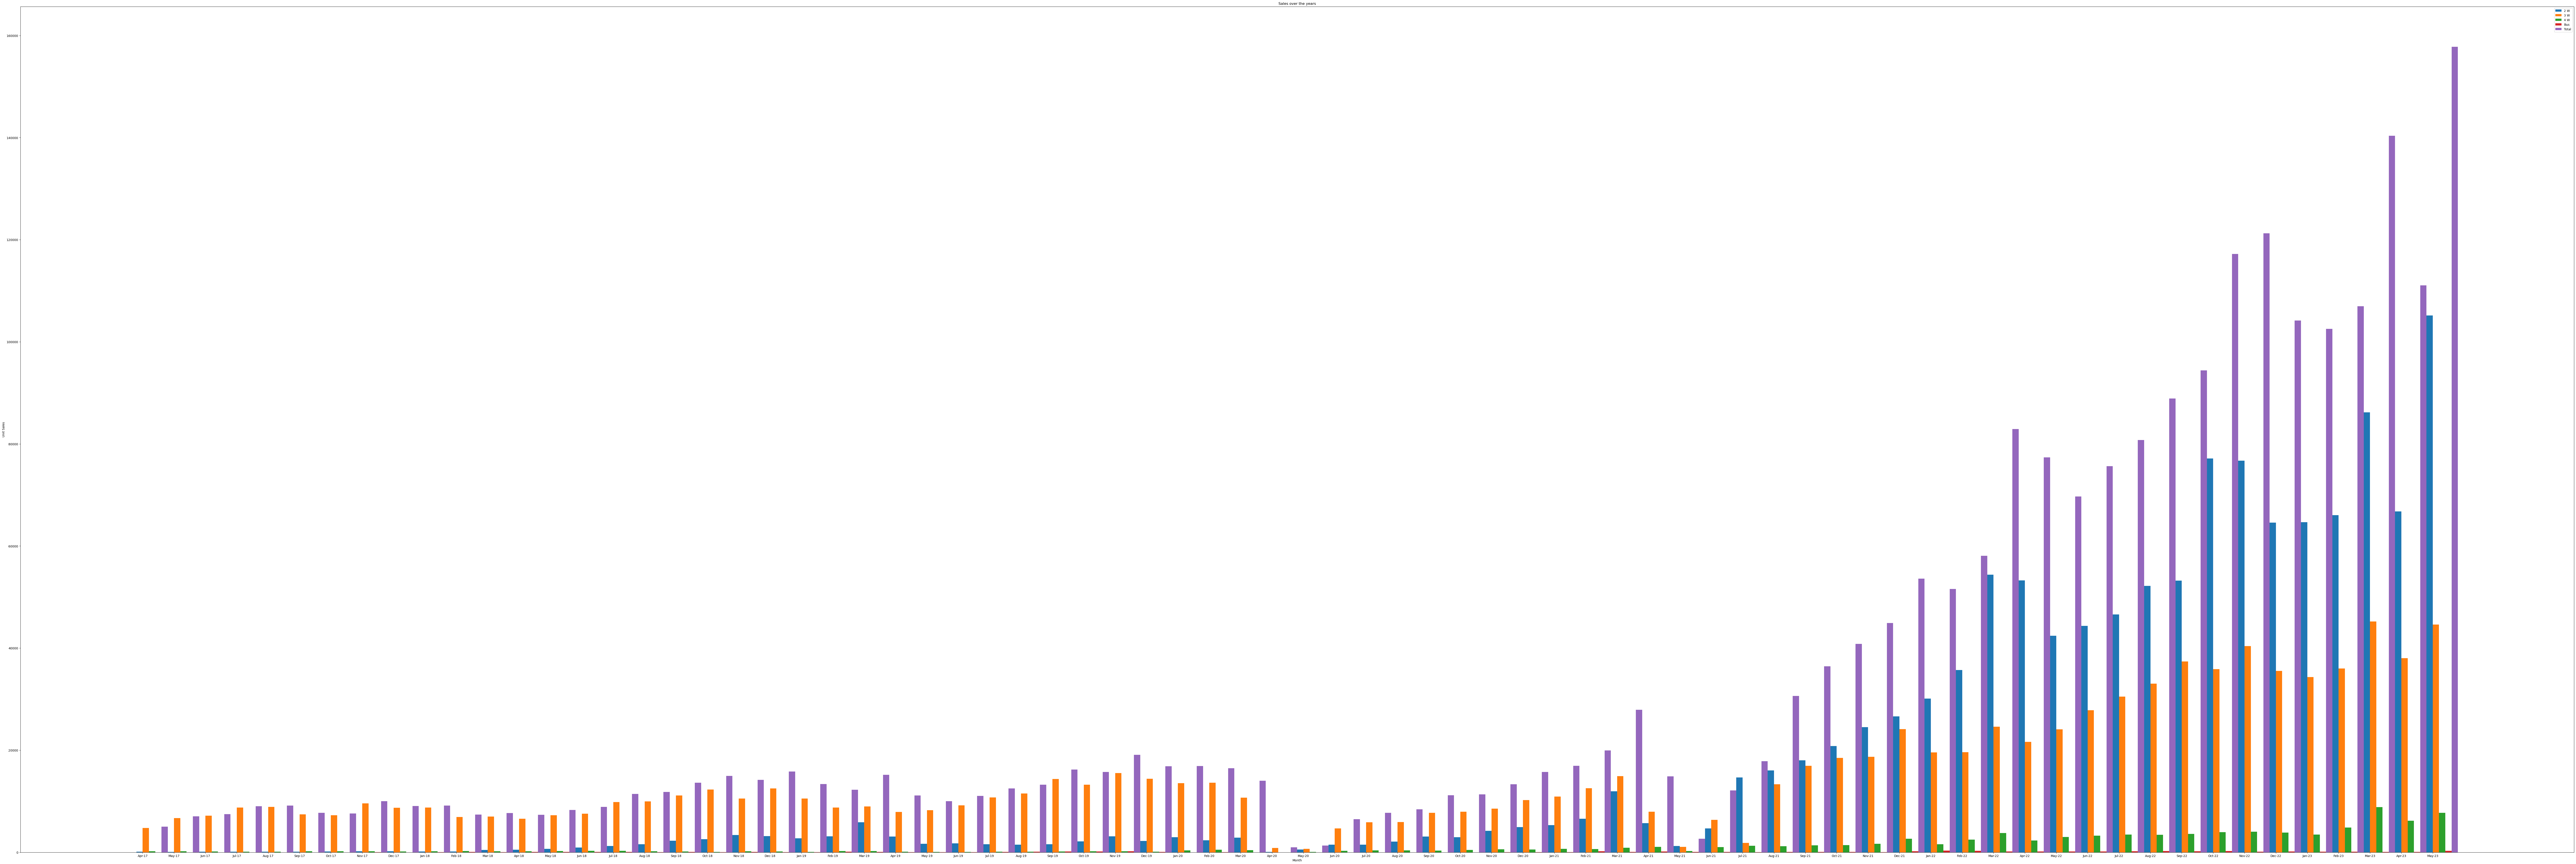

In [103]:
# Sample data (replace with your data)
categories = years
data1 = w2
data2 = w3
data3 = w4
data4 = bus
data5 = total

# Create a bar plot with positions adjusted to avoid overlap
bar_width = 0.2
gap_width = 0.5  # Adjust gap size as needed
total_width = bar_width + gap_width
index = range(len(categories))

plt.bar(index, data1, bar_width, label="2 W")
plt.bar([p + bar_width for p in index], data2, bar_width, label="3 W")
plt.bar([p + 2*bar_width for p in index], data3, bar_width, label="4 W")
plt.bar([p + 3*bar_width for p in index], data4, bar_width, label="Bus")
plt.bar([p + 4*bar_width for p in index], data5, bar_width, label="Total")

# Set labels and title
plt.xlabel("Month")
plt.ylabel("Unit Sales")
plt.title("Sales over the years")

# Add legend
plt.legend()

# Set x-axis tick positions and labels
plt.xticks([p + bar_width / 2 for p in index], categories)

#plt.figure(figsize=(10, 6))

plt.rcParams['figure.figsize'] = [150, 50]

# Display the plot
plt.show()
